Nome: Anakin Dantas Rodrigues   

Matrícula: $2023033173$

In [130]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd

Tabelas de dados:

In [131]:
x_i = pd.read_csv('icfis-master/data/edc3deuttemp2007.txt', comment='%', sep='\s+', header=None, \
               names=['Bag','ztop','Age', 'Deuterium', 'Temperature'])
y_i = pd.read_csv('icfis-master/data/Complete_TAVG_complete.txt', comment='%', sep='\s+', header=None, \
               names=['Year','Month','MA', 'MAUnc', 'AA', 'AAUnc', 'FYA', 'FYUnc', 'TYA', 'TYUnc', 'TwYA', 'TwYUnc'])
z_i = pd.read_csv('icfis-master/data/co2_mm_mlo.txt', comment='#', sep='\s+', header=None, \
               names=['date','month','interpolated', 'trend', 'days', 'avarage', 'season corr'])

In [132]:
x_i.head()

,Bag,ztop,Age,Deuterium,Temperature
0,13,6.60,38.37379,-390.9,0.88
1,14,7.15,46.81203,-385.1,1.84
2,15,7.70,55.05624,-377.8,3.04
3,16,8.25,64.41511,-394.1,0.35
4,17,8.80,73.15077,-398.7,-0.42


# Questão 1:

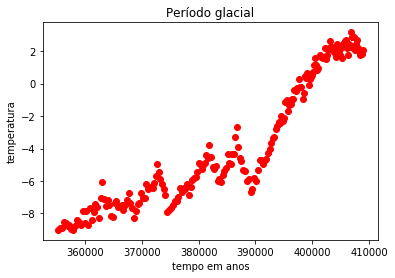

In [133]:
#Período glacial com inicio em aproximadamente 355000 anos atrás.

idade_glacial = x_i.loc[x_i.Age > 355000]
período_glacial = idade_glacial.loc[idade_glacial.Age < 409000]

tempo = período_glacial.Age
temperatura = período_glacial.Temperature
plt.figure()
plt.scatter(tempo, temperatura, c='r')
plt.title('Período glacial')
plt.xlabel('tempo em anos')
plt.ylabel('temperatura')
plt.show()

In [134]:
#Algoritmo de Regressão linear

def sums(dados):
    [X,Y,XX,YY,XY] = [0.0,0.0,0.0,0.0,0.0]
    for p in dados:
        X += p[0]
        Y += p[1]
        XX += pow(p[0],2.0)
        YY += pow(p[1],2.0)
        XY += p[0]*p[1]
    return [X,Y,XX,YY,XY]

def linear_lsf(dados,**args):
    [X,Y,XX,YY,XY] = sums(dados)
    m = len(dados)
    a0 = (Y*XX-X*XY)/(m*XX-X*X)
    a1 = (m*XY-X*Y)/(m*XX-X*X)    
    return a0,a1

def linear_f(x):
    a0,a1 = linear_lsf(dados)
    return a0+a1*x


def R2(dados):
    import math as mt
    [X,Y,XX,YY,XY] = sums(dados)
    m = len(dados)
    return (m*XY-X*Y)/(mt.sqrt((m*XX-X*X)*(m*YY-Y*Y)))

In [135]:
#Taxa de crescimento da temperatura como função do tempo
#Relacionando com a equação da reta (y = a1x + a0), a1 corresponde à inclinação da reta. 

período_glacial1 = período_glacial.drop('Bag', axis = 1).drop('ztop', axis = 1).drop('Deuterium', axis = 1)

dados = período_glacial1.values.tolist()
a0, a1 = linear_lsf(dados)
r2  = R2(dados)
print('a_0 = ', a0)
print('R^2 = ', r2)
print('Taxa de crescimento da temperatura: a_1 = ', a1)

a_0 =  -92.04646125195414
R^2 =  0.9396656602674062
Taxa de crescimento da temperatura: a_1 =  0.0002297076869702253


<IPython.core.display.Javascript object>


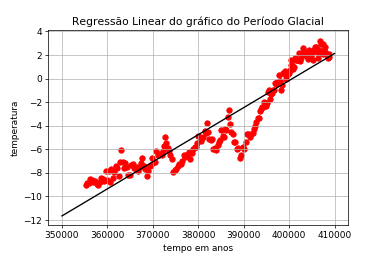

In [136]:
%matplotlib notebook

#Gráfico de regressão linear
x = np.linspace(350000,410000,100)
y = linear_f(x)

plt.figure()
plt.text(0,12,r'$R^2$ = '+str(r2))
plt.text(0,10,r'$a_0$ = '+str(a0))
plt.text(0,7.5,r'$a_1$ = '+ str(a1))
plt.plot(x,y,'k')
for p in dados:
    plt.scatter(p[0],p[1],c='r')
plt.grid(True)
plt.title('Regressão Linear do gráfico do Período Glacial')
plt.xlabel('tempo em anos')
plt.ylabel('temperatura')
plt.show()

# Questão 2:

In [137]:
y_i.head()

,Year,Month,MA,MAUnc,AA,AAUnc,FYA,FYUnc,TYA,TYUnc,TwYA,TwYUnc
0,1750,1,-0.576,4.175,-0.930,3.534,NaN,NaN,NaN,NaN,NaN,NaN
1,1750,2,-1.406,5.056,-0.927,2.351,NaN,NaN,NaN,NaN,NaN,NaN
2,1750,3,-0.327,5.337,-0.952,2.262,NaN,NaN,NaN,NaN,NaN,NaN
3,1750,4,-0.097,2.937,-0.981,2.214,NaN,NaN,NaN,NaN,NaN,NaN
4,1750,5,-1.623,1.918,-1.321,0.961,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>


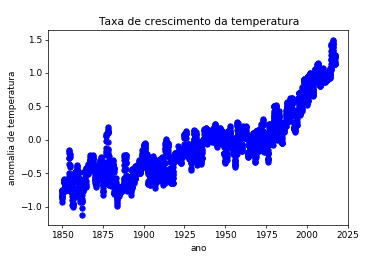

In [138]:
#Perído à partir de 1850:
ano = y_i.loc[y_i.Year > 1849]
ano1 = ano.loc[ano.Year < 2018]

tempo1 = ano1.Year
anomalia_temp = ano1.AA

plt.figure()
plt.scatter(tempo1, anomalia_temp, c='b')
plt.title('Taxa de crescimento da temperatura')
plt.xlabel('ano')
plt.ylabel('anomalia de temperatura')
plt.show()

In [30]:
#Taxa de crescimento da temperatura como função do tempo
anos = ano1.drop('Month', axis = 1).drop('MA', axis = 1).drop('MAUnc', axis = 1).drop('AAUnc', axis = 1).drop('FYA', axis = 1).drop('FYUnc', axis = 1).drop('TYA', axis = 1).drop('TYUnc', axis = 1).drop('TwYA', axis = 1).drop('TwYUnc', axis = 1)

dados = anos.values.tolist()
a0, a1 = linear_lsf(dados)
r2  = R2(dados)
print('a_0 = ', a0)
print('R^2 = ', r2)
print('Taxa de crescimento da temperatura: a_1 = ', a1)

x = np.linspace(1850,2025,100)
y = linear_f(x)

a_0 =  -17.883370054658094
R^2 =  0.8791920792147335
Taxa de crescimento da temperatura: a_1 =  0.00920656394312035


<IPython.core.display.Javascript object>


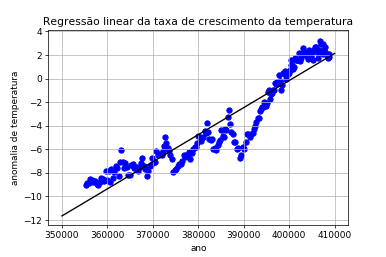

In [139]:
%matplotlib notebook

#Gráfico de regressão linear
plt.figure()
plt.text(0,12,r'$R^2$ = '+str(r2))
plt.text(0,10,r'$a_0$ = '+str(a0))
plt.text(0,7.5,r'$a_1$ = '+ str(a1))

plt.plot(x,y,'k')
plt.title('Regressão linear da taxa de crescimento da temperatura')
plt.xlabel('ano')
plt.ylabel('anomalia de temperatura')
for p in dados:
    plt.scatter(p[0],p[1], c='b')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


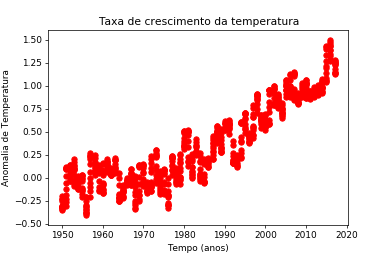

In [143]:
#Perído à partir de 1950:
ano = y_i.loc[y_i.Year > 1949]
ano1 = ano.loc[ano.Year < 2018]

tempo1 = ano1.Year
anomalia_temp = ano1.AA

plt.figure()
plt.scatter(tempo1, anomalia_temp, c='r')
plt.title('Taxa de crescimento da temperatura')
plt.xlabel('Tempo (anos)')
plt.ylabel('Anomalia de Temperatura')
plt.show()

In [147]:
#Taxa de crescimento da temperatura como função do tempo
anos = ano1.drop('Month', axis = 1).drop('MA', axis = 1).drop('MAUnc', axis = 1).drop('AAUnc', axis = 1).drop('FYA', axis = 1).drop('FYUnc', axis = 1).drop('TYA', axis = 1).drop('TYUnc', axis = 1).drop('TwYA', axis = 1).drop('TwYUnc', axis = 1)

dados = anos.values.tolist()
a0, a1 = linear_lsf(dados)
r2  = R2(dados)
print('a_0 = ', a0)
print('R^2 = ', r2)
print('Taxa de crescimento da temperatura: a_1 = ', a1)

a_0 =  -39.1556764403699
R^2 =  0.8922798373420138
Taxa de crescimento da temperatura: a_1 =  0.019921396852057568


<IPython.core.display.Javascript object>


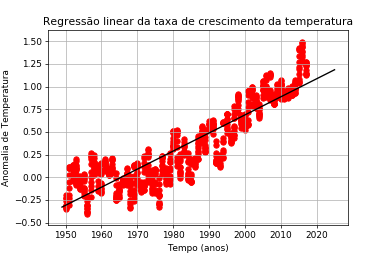

In [148]:
%matplotlib notebook

#Gráfico de regressão linear

x = np.linspace(1949,2025,100)
y = linear_f(x)
dados = anos.values.tolist()

plt.figure()
plt.text(0,12,r'$R^2$ = '+str(r2))
plt.text(0,10,r'$a_0$ = '+str(a0))
plt.text(0,7.5,r'$a_1$ = '+ str(a1))
plt.plot(x,y,'k')
for p in dados:
    plt.scatter(p[0],p[1],c='r')
plt.grid(True)
plt.title('Regressão linear da taxa de crescimento da temperatura')
plt.xlabel('Tempo (anos)')
plt.ylabel('Anomalia de Temperatura')
plt.show()

# Questão 3:

Podemos observar que a taxa de crescimento da temperatura tem sua inclinação cada vez mais acentuada com o passar dos anos. 

Comparando o resultado da Questão 2 com a Questão 1, podemos perceber que durante um período glacial paleolitico essa taxa se aproximava de 0,02% ao ano, enquanto pós revolução industrial, analisando os anos 1950-2018 essa taxa de crescimento já estava em 0,9%, ou seja, um amento de uma casa decimal. Esse aumento é muito significativo e não pode ser considerado como algo irrelevante.

Além disso, a taxa aumenta continuamente, podemos observar isso em um recorte de tempo mais recente (à partir de 1950), no qual a taxa de crescimento da temperatura é 2%.

Portanto, analisando o banco de dados das temperaturas do planeta, os gráficos de diferentes períodos e a inclinação das curvas, se torna indiscutível a veracidade do efeito chamado "aquecimento global antropogênico".

# Questão 4:

In [165]:
ano = y_i.loc[y_i.Year > 1899]
ano1 = ano.loc[ano.Year < 2018]

tempo1 = ano1.Year
anomalia_temp = ano1.AA

carbono = z_i
tempo2 = carbono.date

<IPython.core.display.Javascript object>


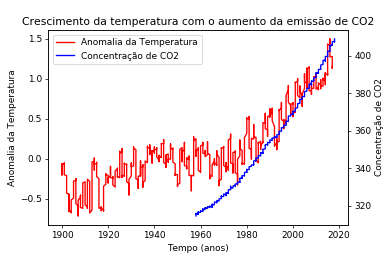

In [166]:
#Gráfico de Temperatura em função do tempo, sobreposto com o gráfico do Carbono em função do tempo 
figure, left_ax = plt.subplots()

l1 = left_ax.plot(tempo1, anomalia_temp, color='red', label='Anomalia da Temperatura')
left_ax.set_ylabel('Anomalia da Temperatura')

right_ax = left_ax.twinx()
l2 = right_ax.plot(tempo2, carbono['avarage'], color='blue', label='Concentração de CO2')
right_ax.set_ylabel('Concentração de CO2')

#concatenando a legenda:
lns = l1+l2
labs = [l.get_label() for l in lns]
left_ax.legend(lns, labs, loc=0)
left_ax.set_xlabel('Tempo (anos)')
plt.title('Crescimento da temperatura com o aumento da emissão de CO2')
plt.show()

<IPython.core.display.Javascript object>


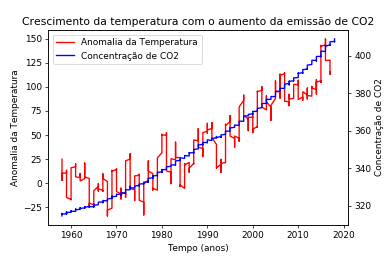

In [153]:
#Gráfico de Temperatura em função do tempo, sobreposto com o gráfico do Carbono em função do tempo 
#à partir de 1958
x = np.linspace(1957,2020,100)
y = linear_f(x)

tempo1 = temp.Year
anomalia_temp = temp.AA

figure, left_ax = plt.subplots()
l1 = left_ax.plot(tempo1, anomalia_temp, color='red', label='Anomalia da Temperatura')
left_ax.set_ylabel('Anomalia da Temperatura')

right_ax = left_ax.twinx()
l2 = right_ax.plot(tempo2, carbono['avarage'], color='blue', label='Concentração de CO2')
right_ax.set_ylabel('Concentração de CO2')

#concatenando a legenda:
lns = l1+l2
labs = [l.get_label() for l in lns]
left_ax.legend(lns, labs, loc=0)

left_ax.set_xlabel('Tempo (anos)')
plt.title('Crescimento da temperatura com o aumento da emissão de CO2')
plt.show()

In [189]:
#Taxas de crescimento individuais (à partir de 1958)
temp = ano1.drop('Month', axis = 1).drop('MA', axis = 1).drop('MAUnc', axis = 1).drop('AAUnc', axis = 1).drop('FYA', axis = 1).drop('FYUnc', axis = 1).drop('TYA', axis = 1).drop('TYUnc', axis = 1).drop('TwYA', axis = 1).drop('TwYUnc', axis = 1)
temp = temp.loc[temp.Year > 1957]
carb = carbono.drop('month', axis = 1).drop('interpolated', axis = 1).drop('trend', axis = 1).drop('days', axis = 1).drop('season corr', axis = 1)
dados1 = np.array(temp)
dados2 = np.array(carb)

a0, a1 = linear_lsf(dados1)
r2  = R2(dados1)
print('Dados usando minimos quadrados para Anomalia da Temperatura:')
print('a_0 = ', a0)
print('R^2 = ', r2)
print('Taxa de crescimento da temperatura: a_1 = ', a1)

a0, a1 = linear_lsf(dados2)
r2  = R2(dados2)
print('Dados usando minimos quadrados para Concentração de Carbono:')
print('a_0 = ', a0)
print('R^2 = ', r2)
print('Taxa de crescimento do carbono: a_1 = ', a1)

Dados usando minimos quadrados para Anomalia da Temperatura:
a_0 =  -44.20640892300858
R^2 =  0.9033236186900512
Taxa de crescimento da temperatura: a_1 =  0.022451539779571098
Dados usando minimos quadrados para Concentração de Carbono:
a_0 =  -2728.394693738233
R^2 =  0.9914883027645015
Taxa de crescimento do carbono: a_1 =  1.5503479493094348


# Questão 5:

In [196]:
#multiplicando por 100, pois os valores estavam em porcentagem
temp['AA'] = temp['AA']*100


dados1 = temp.values.tolist()
dados2 = carb.values.tolist()
dados = dados1 + dados2
dados = np.concatenate((dados1,dados2))

# O r^2 obtido usando minimos quadrados nas duas funções simultaneamente corresponde ao 
# índice de correlação entre a anomalia de temperatura e a concetração de CO2.

a0, a1 = linear_lsf(dados)
r2  = R2(dados)
print('Dados linarizados simultaneamente:')
print('a_0 = ', a0)
print('a_1 = ', a1)
print('Índice de correlação: R^2 = ', r2)

Dados linarizados simultaneamente:
a_0 =  -2146020028201088.5
a_1 =  1090047541415.8533
Índice de correlação: R^2 =  0.5155434820176095


O índice de correlação entre os dois é de aproximadamente 52%, portanto tornasse evidente que o aumento dessas duas funções de fato estão relacionadas realidade.

<IPython.core.display.Javascript object>


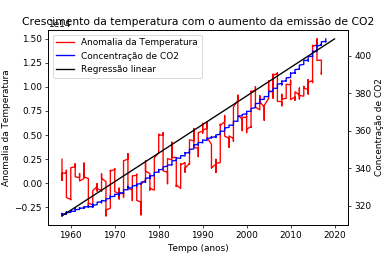

In [197]:
#Gráfico de Temperatura em função do tempo, sobreposto com o gráfico do Carbono em função do tempo 
#à partir de 1958
x = np.linspace(1958,2020,100)
y = linear_f(x)

tempo1 = temp.Year
anomalia_temp = temp.AA

figure, left_ax = plt.subplots()
l1 = left_ax.plot(tempo1, anomalia_temp, color='red', label='Anomalia da Temperatura')
left_ax.set_ylabel('Anomalia da Temperatura')

right_ax = left_ax.twinx()
l2 = right_ax.plot(tempo2, carbono['avarage'], color='blue', label='Concentração de CO2')
right_ax.set_ylabel('Concentração de CO2')

linear_ax = left_ax.twinx()
l3 = linear_ax.plot(x, y, 'k', label='Regressão linear') 
linear_ax.get_yaxis().set_visible(False)


#concatenando a legenda:
lns = l1+l2+l3
labs = [l.get_label() for l in lns]
left_ax.legend(lns, labs, loc=0)

plt.title('Crescimento da temperatura com o aumento da emissão de CO2')
left_ax.set_xlabel('Tempo (anos)')
plt.show()